In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

---
Importing images:

In [2]:
flat_h_img = Image.open('images/bell_h_flat.png')
flat_w_img = Image.open('images/bell_w_flat.png')
h_img = Image.open('images/bell_h.png')
w_img = Image.open('images/bell_w.png')

flat_h_frame = np.array(flat_h_img)
flat_w_frame = np.array(flat_w_img)
h_frame = np.array(h_img)
w_frame = np.array(w_img)

In [3]:
flat_h_frame, h_frame

(array([[  40,   40,   40, ...,  394,  394,  394],
        [  40,   40,   40, ...,  394,  394,  394],
        [  40,   40,   40, ...,  394,  394,  394],
        ...,
        [  40,   40,   40, ..., 2661, 2688, 2712],
        [  40,   40,   40, ..., 2660, 2690, 2712],
        [  40,   40,   40, ..., 2657, 2686, 2714]], dtype=int32),
 array([[2824, 2824, 2824, ..., 3324, 3324, 3324],
        [2824, 2825, 2825, ..., 3324, 3324, 3324],
        [2825, 2825, 2825, ..., 3324, 3324, 3324],
        ...,
        [2788, 2788, 2788, ..., 5591, 5618, 5642],
        [2788, 2788, 2788, ..., 5590, 5620, 5642],
        [2788, 2788, 2788, ..., 5587, 5616, 5644]], dtype=int32))

From above, I can see how sea level in the flat frame is "40". I can use np.where to mask the normal frame (with underwater elevations) to get just the sea pixels, to isolate them for subtraction:

In [4]:
sub_val = 500  # how much to subtract sea pixels by

h_frame_masked = np.where(flat_h_frame == 40,  # where elev data is 40 (sea)
                          h_frame - sub_val,  # if sea, then use underwater elev data minus sub_val
                          h_frame)  # if not sea (is land), then use land elev data

h_frame_masked

array([[2324, 2324, 2324, ..., 3324, 3324, 3324],
       [2324, 2325, 2325, ..., 3324, 3324, 3324],
       [2325, 2325, 2325, ..., 3324, 3324, 3324],
       ...,
       [2288, 2288, 2288, ..., 5591, 5618, 5642],
       [2288, 2288, 2288, ..., 5590, 5620, 5642],
       [2288, 2288, 2288, ..., 5587, 5616, 5644]], dtype=int32)

As you can see, the masked frame is just h_frame with some pixels subtracted by 500. These must be the sea pixels.

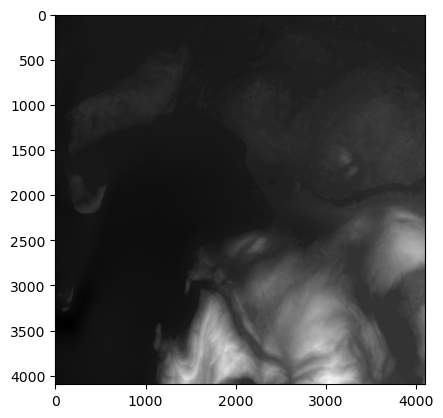

In [5]:
plt.imshow(h_frame, cmap='gist_gray')

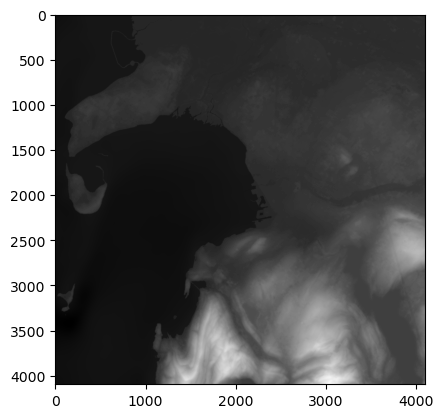

In [6]:
plt.imshow(h_frame_masked, cmap='gist_gray')
im = Image.fromarray(h_frame_masked)
im.save('images/bell_h_deep_sea.png')

As seen above, the masked h_frame `h_frame_masked` is the same, just with starker contrast between sea and land. Colors are shown as different due to larger range over which to plot pixel values, but the land pixels have the same values.

The `sub_val` can be tweaked to give a better drop in elevation from land to sea depending on how the heightmap looks in the map editor. Experimentation required.

Now, I do the same thing for the world map:

In [7]:
flat_w_frame, w_frame

(array([[  40,   40,   40, ..., 8709, 8682, 8707],
        [  40,   40,   40, ..., 8680, 8627, 8621],
        [  40,   40,   40, ..., 8658, 8570, 8523],
        ...,
        [ 343,  341,  341, ..., 7770, 7855, 7941],
        [ 339,  338,  338, ..., 7859, 7954, 8043],
        [ 336,  336,  336, ..., 7939, 8040, 8131]], dtype=int32),
 array([[ 2370,  2360,  2351, ..., 11639, 11612, 11637],
        [ 2366,  2356,  2346, ..., 11610, 11557, 11551],
        [ 2362,  2352,  2341, ..., 11588, 11500, 11453],
        ...,
        [ 3273,  3271,  3271, ..., 10700, 10785, 10871],
        [ 3269,  3268,  3268, ..., 10789, 10884, 10973],
        [ 3266,  3266,  3266, ..., 10869, 10970, 11061]], dtype=int32))

In [8]:
# assumption: heightmap and worldmap both use same values for pixels representing same geographic locations,
# so I should have no problem subtracting same sub_val as before from sea pixels.

# I see above that sea pixels are likely valued as "40", which is the same as the heightmap. This supports my argument.

w_frame_masked = np.where(flat_w_frame == 40,  # where elev data is 40 (sea)
                          w_frame - sub_val,  # if sea, then use underwater elev data minus sub_val
                          w_frame)  # if not sea (is land), then use land elev data

w_frame_masked

array([[ 1870,  1860,  1851, ..., 11639, 11612, 11637],
       [ 1866,  1856,  1846, ..., 11610, 11557, 11551],
       [ 1862,  1852,  1841, ..., 11588, 11500, 11453],
       ...,
       [ 3273,  3271,  3271, ..., 10700, 10785, 10871],
       [ 3269,  3268,  3268, ..., 10789, 10884, 10973],
       [ 3266,  3266,  3266, ..., 10869, 10970, 11061]], dtype=int32)

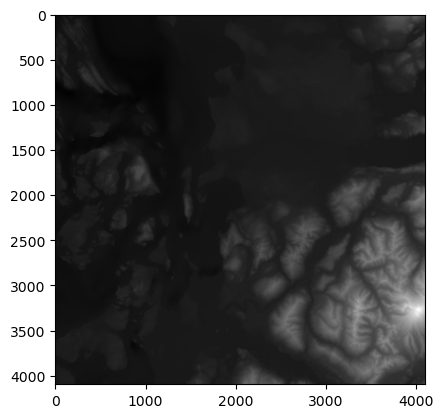

In [9]:
plt.imshow(w_frame_masked, cmap='gist_gray')
im = Image.fromarray(w_frame_masked)
im.save('images/bell_w_deep_sea.png')